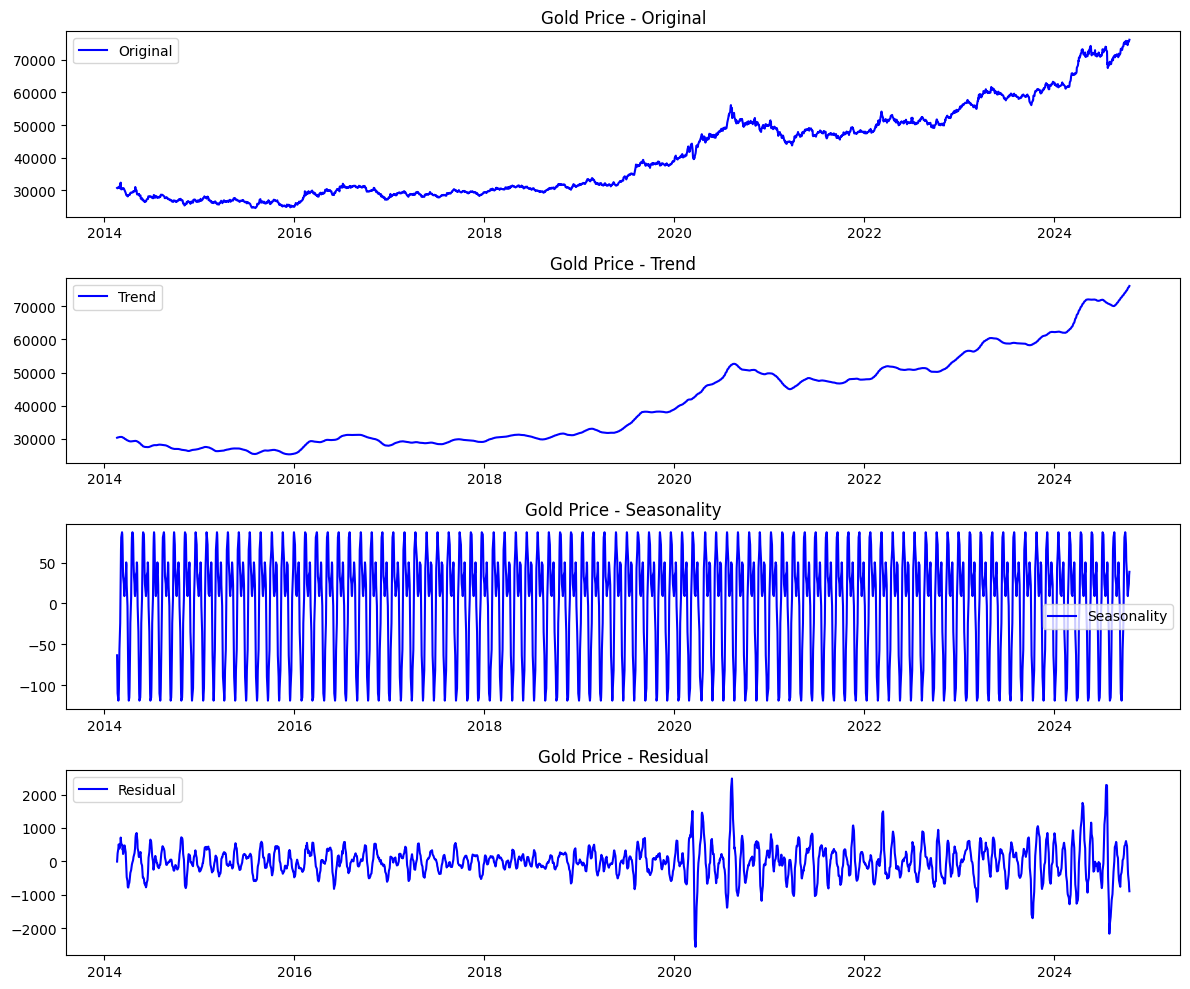

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = '/content/Gold Price.csv'
df = pd.read_csv(file_path)

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Apply 7-day moving average smoothing on 'Price'
df['Price_Smoothed'] = df['Price'].rolling(window=7).mean()

# Drop NaN values after smoothing to align with decomposition
df = df.dropna(subset=['Price_Smoothed'])

# Decompose the time series (using 'Price' instead of missing 'USD (AM)')
decomposition = seasonal_decompose(df['Price_Smoothed'], model='additive', period=30)

# Create a new DataFrame for plotting that aligns with decomposed results
decomp_df = pd.DataFrame({
    'Date': df['Date'].iloc[30:],  # Remove first 30 rows to match decomposition output
    'Original': df['Price'].iloc[30:],
    'Trend': decomposition.trend.iloc[30:],
    'Seasonality': decomposition.seasonal.iloc[30:],
    'Residual': decomposition.resid.iloc[30:]
}).dropna()  # Drop any remaining NaNs

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

components = ['Original', 'Trend', 'Seasonality', 'Residual']
for i, comp in enumerate(components):
    axes[i].set_title(f'Gold Price - {comp}')
    axes[i].plot(decomp_df['Date'], decomp_df[comp], label=comp, color='b')
    axes[i].legend()

plt.tight_layout()
plt.show()
